## Price Estimates

- Data Source: `Kaggle`

#### Tasks:
- **Cleansing**
- **EDA**
- **Merge Additional Data by geo/zip**
- **K-Means Clustering**
- **Model Price**

In [154]:
#Import Libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import os
import ipywidgets as widgets
from IPython.display import display
import folium

In [155]:
#Read Data
df = pd.read_csv('./realtor-data.zip.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


## Merge Additional Data
- `Zip` or `city` as **Primary Key**
- Crime Data, Population Data, etc.

In [15]:
city = df['city'].iloc[0].lower()
state = df['state'].iloc[0].lower().strip().replace(' ', '')
url = f'https://www.census.gov/quickfacts/fact/table/{city}{state},US/RHI225222'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser') #Census takes too long

In [60]:
url = 'https://www.unitedstateszipcodes.org/95765/' #Apply Zip here

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

r = requests.get(url, headers=headers)

In [73]:
# #https://www.unitedstateszipcodes.org/95765/
# for c,st in zip(df[['city', 'state']].drop_duplicates()['city'], df[['city', 'state']].drop_duplicates()['state']):
#     url = f'https://www.census.gov/quickfacts/fact/table/{c}{st},US/RHI225222'
#     r = requests.get(url)
#     print(c, r)
#     soup = BeautifulSoup(r.content, 'html.parser')

In [72]:
zip_df = pd.read_csv('population_by_zip_2010.csv')

## Cleansing
- Null Values + Outliers _`viz + stats`_

In [156]:
# Remove Outliers in Analysis Columns
df = df.query('bath <=8 and bed <=10 and house_size <= 4000 and state not in ["Puerto Rico", "Virgin Islands"]') 

In [167]:
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Null_Count'})

,Null_Count
status,0
bed,0
bath,0
acre_lot,165657
city,15
state,0
zip_code,3
house_size,0
prev_sold_date,240427
price,0


In [ ]:
#Regression to impute acre_lot? x: house_size, bed, bath

## EDA
- _Univariate_ Analysis of Price
- _Bivariate_ Analysis
- Correlation
- Sig. Testing

#### Distributions, Multidimensional Viz 👍🏽

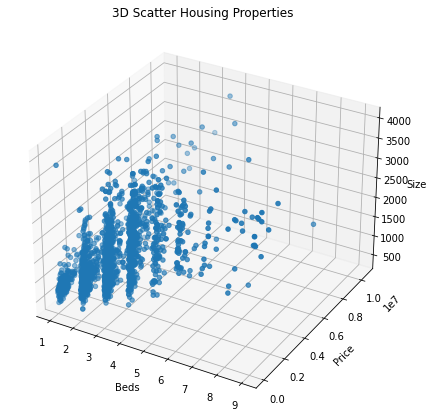

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,9))
ax = plt.axes(projection = '3d') #3D scatter plot

sampled_df = df.sample(n=2000) #Sample df for Viz

ax.scatter(sampled_df['bed'], sampled_df['price'], sampled_df['house_size'])

ax.set_xlabel('Beds')
ax.set_ylabel('Price')
ax.set_zlabel('Size')
ax.set_title('3D Scatter Housing Properties')
plt.show()